<a href="https://colab.research.google.com/github/belkaaloulmehdi/Real-Estate-House-Price-Trends-in-Bangladesh/blob/main/Real_Estate_%26_House_Price_Trends_in_Bangladesh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Real Estate & House Price Trends in Bangladesh:


# **Data Exploration**

## Libraries import

In [ ]:
# Import
import pandas as pd
import numpy as np
import scipy as stats
import seaborn as sns
import matplotlib.pyplot as plt

# Import libraries for Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error

## Data cleaning

In [ ]:
# Import & visualize dataset
df = pd.read_csv("/house_price_bd.csv")
df.head()

,Title,Bedrooms,Bathrooms,Floor_no,Occupancy_status,Floor_area,City,Price_in_taka,Location
0,We Are Offering You A Very Spacious 1960 Sq Ft...,3.0,4.0,3,vacant,1960.0,dhaka,"৳39,000,000","Gulshan 1, Gulshan"
1,Valuable 1705 Square Feet Apartment Is Ready T...,3.0,3.0,1,vacant,1705.0,dhaka,"৳16,900,000","Lake Circus Road, Kalabagan"
2,1370 square feet apartment is ready to sale in...,3.0,3.0,6,vacant,1370.0,dhaka,"৳12,500,000","Shukrabad, Dhanmondi"
3,2125 Square Feet Apartment For Sale In Bashund...,3.0,3.0,4,vacant,2125.0,dhaka,"৳20,000,000","Block L, Bashundhara R-A"
4,Buy This 2687 Square Feet Flat In The Nice Are...,3.0,3.0,4,vacant,2687.0,dhaka,"৳47,500,000","Road No 25, Banani"


In [ ]:
# Print the shape of dataset in the form of (#rows, #columns)
print(df.shape)

(3865, 9)


In [ ]:
# We use the function describe to have the main statistics information
df.describe()

,Bedrooms,Bathrooms,Floor_area
count,2864.000000,2864.000000,3766.000000
mean,3.133031,2.992668,1940.299522
std,2.215457,0.978434,6024.921935
min,1.000000,1.000000,84.000000
25%,3.000000,3.000000,1100.000000
50%,3.000000,3.000000,1380.000000
75%,3.000000,3.000000,1860.000000
max,50.000000,10.000000,195840.000000


**==> We noticed that 75% of the properties have >= 3 bedrooms >= 3 bathrooms and floor_area < 2000 sqft**

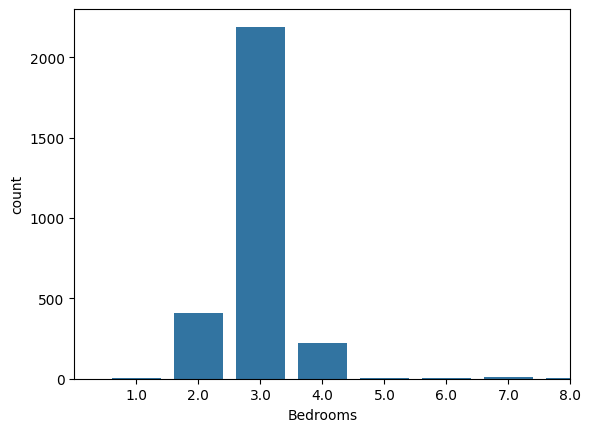

In [ ]:
df_count = df.groupby("Bedrooms").size().reset_index(name="count")
sns.barplot(x="Bedrooms", y="count", data=df_count)
plt.xlim(-1, 7)
plt.show()

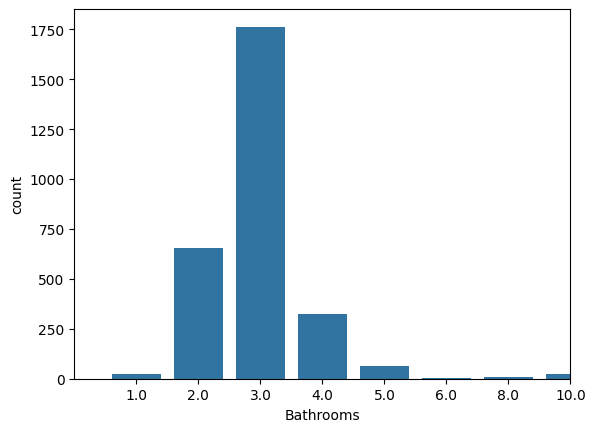

In [ ]:
df_count = df.groupby("Bathrooms").size().reset_index(name="count")
sns.barplot(x="Bathrooms", y="count", data=df_count)
plt.xlim(-1, 7)
plt.show()

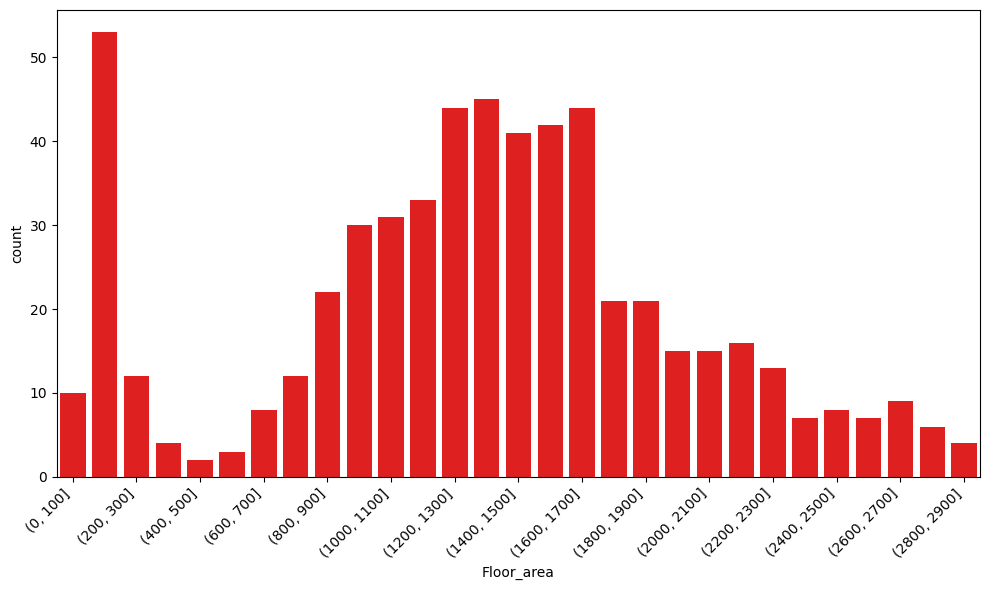

In [ ]:
bins = np.arange(0, 3000, 100)


df_count = df.groupby("Floor_area").size().reset_index(name="count")
df_count[df_count["Floor_area"] <= 3000]
df_count = pd.cut(df_count["Floor_area"], bins).value_counts().reset_index(name="count")
plt.figure(figsize=(10,6))  # Set the figure size to 10 inches wide and 6 inches tall
sns.barplot(x="Floor_area", y="count", data=df_count, color = "red", )
plt.xticks(np.arange(0, len(df_count), step=2))  # Affiche une étiquette sur deux
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels by 45 degrees
plt.tight_layout()  # Adjust the layout to fit the labels
plt.show()

In [ ]:
# We use this function to have the number and Dtype of the columns
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3865 entries, 0 to 3864
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Title             3865 non-null   object 
 1   Bedrooms          2864 non-null   float64
 2   Bathrooms         2864 non-null   float64
 3   Floor_no          3181 non-null   object 
 4   Occupancy_status  3766 non-null   object 
 5   Floor_area        3766 non-null   float64
 6   City              3865 non-null   object 
 7   Price_in_taka     3865 non-null   object 
 8   Location          3859 non-null   object 
dtypes: float64(3), object(6)
memory usage: 271.9+ KB
None


**==> We noticed that Floor_no and Price_in_taka are in object type**

In [ ]:
# We look at the values of each column
variables_list = df[["Bedrooms","Bathrooms", "Floor_no", "Occupancy_status", "Floor_area", "City", "Price_in_taka"]]
for value in variables_list:
    print(f'Possible value an doccurence for {value} variable are :')
    print(df[[value]].value_counts())

Possible value an doccurence for Bedrooms variable are :
Bedrooms
3.0         2191
2.0          406
4.0          220
7.0            8
16.0           5
5.0            5
8.0            4
21.0           3
18.0           3
1.0            3
6.0            3
22.0           2
23.0           2
33.0           2
50.0           2
15.0           1
13.0           1
20.0           1
27.0           1
46.0           1
Name: count, dtype: int64
Possible value an doccurence for Bathrooms variable are :
Bathrooms
3.0          1763
2.0           653
4.0           324
5.0            66
10.0           24
1.0            22
8.0             8
6.0             4
Name: count, dtype: int64
Possible value an doccurence for Floor_no variable are :
Floor_no            
1                       532
4                       418
5                       402
2                       397
3                       366
6                       316
7                       252
8                       228
9                       167


**==> We need to clean Floor_no and Price_in_taka.**

In [ ]:
# We checked missing data
df.isnull().sum()

,0
Title,0
Bedrooms,1001
Bathrooms,1001
Floor_no,684
Occupancy_status,99
Floor_area,99
City,0
Price_in_taka,0
Location,6


In [ ]:
# We checked duplicates
df.duplicated().sum()

934

In [ ]:
# Remove duplicates
df = df.drop_duplicates(keep='last')

# "Title" and "Location" column drop
df = df.drop(["Title", "Location"], axis=1)

# Delete rows in [8th,4th to 8th Backside,A1,A2,A3,A4,A5,A6,A7,0+7,5th,1st,1F,G+7] corresponding to full building
floor_to_remove = ["Merin City - Purbach", "4th to 8th Backside", "G+7", "0+7","A1,A2,A3,A4,A5,A6,A7"]
df = df[~df["Floor_no"].isin(floor_to_remove)]

# Replace 8th, 1st, 1F, 5th
df.loc[df["Floor_no"] == "8th", "Floor_no"] = 8
df.loc[df["Floor_no"] == "1st", "Floor_no"] = 1
df.loc[df["Floor_no"] == "1F", "Floor_no"] = 1
df.loc[df["Floor_no"] == "5th", "Floor_no"] = 5

# Remove rows where both Bedrooms and Bathrooms are null and switch to int because we consider it as residential plots or/and commercial units
df = df[(df["Bedrooms"].notnull()) | (df["Bathrooms"].notnull())]
df = df[(df["Floor_no"].notnull())]
df["Bedrooms"] = df["Bedrooms"].astype(int)
df["Bathrooms"] = df["Bathrooms"].astype(int)
df["Floor_area"] = df["Floor_area"].astype(int)
df["Floor_no"] = df["Floor_no"].astype(str)

# Remove rows where 200 > Floor_area > 3000, Bedrooms > 6, and Bathrooms > 6 as we consider them as Outliers
df = df[(df["Floor_area"] > 200) & (df["Floor_area"] <= 3000)]
df = df[df['Bedrooms'] < 4]
df = df[df['Bathrooms'] < 5]

# Price column to remove ৳ and convert "Price_in_taka" column into float64
df["Price_in_taka"] = df["Price_in_taka"].apply(lambda x: x.replace("৳", "").replace(",", ""))
df["Price_in_taka"] = df["Price_in_taka"].astype(np.float64)

# Check cleaned dataset
df.head()

,Bedrooms,Bathrooms,Floor_no,Occupancy_status,Floor_area,City,Price_in_taka
214,3,3,8,vacant,1100,dhaka,4700000.0
215,3,2,2,vacant,1220,dhaka,5000000.0
216,3,3,5,vacant,1240,dhaka,7320000.0
217,3,3,5,vacant,1700,dhaka,6500000.0
218,3,3,1,vacant,1400,dhaka,8500000.0


In [ ]:
# Check duplicates
df.duplicated().sum()

140

In [ ]:
# Data clean check
variables_list = df[["Bedrooms","Bathrooms", "Floor_no", "Floor_area", "City", "Occupancy_status"]]
for value in variables_list:
    print(f'Possible value an doccurence for {value} variable are :')
    print(df[[value]].value_counts())

Possible value an doccurence for Bedrooms variable are :
Bedrooms
3           1598
2            290
1              2
Name: count, dtype: int64
Possible value an doccurence for Bathrooms variable are :
Bathrooms
3            1293
2             461
4             121
1              15
Name: count, dtype: int64
Possible value an doccurence for Floor_no variable are :
Floor_no
1           263
5           240
4           232
6           230
3           220
2           213
7           179
8           167
9           102
10           14
11           13
12            9
13            6
14            1
17            1
Name: count, dtype: int64
Possible value an doccurence for Floor_area variable are :
Floor_area
1300          69
1500          63
1200          58
1350          56
1250          54
              ..
1322           1
1327           1
1338           1
1348           1
2961           1
Name: count, Length: 435, dtype: int64
Possible value an doccurence for City variable are :
City      

In [ ]:
# Check missing data
df.isnull().sum()

,0
Bedrooms,0
Bathrooms,0
Floor_no,0
Occupancy_status,0
Floor_area,0
City,0
Price_in_taka,0


## EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1890 entries, 214 to 3864
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Bedrooms          1890 non-null   int64  
 1   Bathrooms         1890 non-null   int64  
 2   Floor_no          1890 non-null   object 
 3   Occupancy_status  1890 non-null   object 
 4   Floor_area        1890 non-null   int64  
 5   City              1890 non-null   object 
 6   Price_in_taka     1890 non-null   float64
dtypes: float64(1), int64(3), object(3)
memory usage: 118.1+ KB


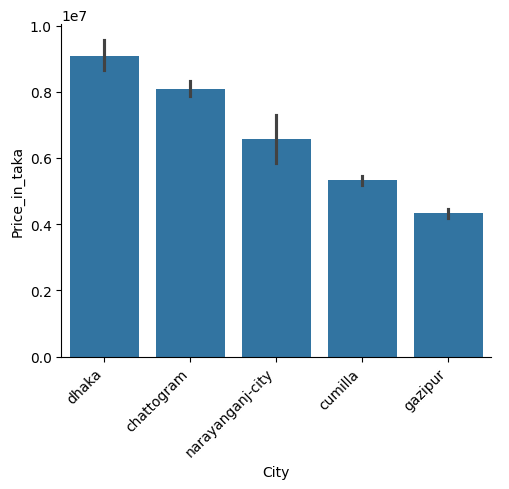

In [ ]:
'''df_sorted = df.sort_values(by='Price_in_taka', ascending=False)
sns.catplot(x="City", y="Price_in_taka",data=df_sorted, kind="bar")'''

df_sorted = df.sort_values(by='Price_in_taka', ascending=False)
g = sns.catplot(x="City", y="Price_in_taka",data=df_sorted, kind="bar")
g.set_xticklabels(rotation=45, ha='right')  # Rotation des étiquettes
plt.tight_layout()  # Ajustement automatique des éléments
plt.show()

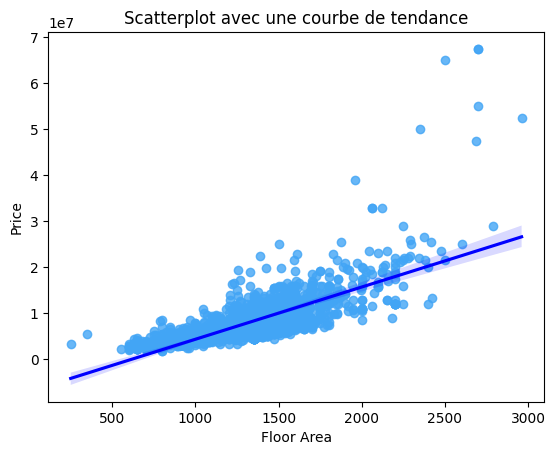

In [ ]:
# Scatterplot with a Trend Line
sns.regplot(x="Floor_area", y="Price_in_taka", scatter=True, color="#42A5F5", line_kws={'color':'blue'}, data=df)

# Add Labels and Title
plt.xlabel('Floor Area')
plt.ylabel('Price')
plt.title('Scatterplot avec une courbe de tendance')

# Display graph
plt.show()

# **Machine Learning**

## Preprocessing 🍳

In [ ]:
# Separate target variable Y from features X
print("Separating target variable from features...")

# Choose the columns we want to have as our features
features_list = ["Bedrooms","Bathrooms","Floor_no","Floor_area","City", "Occupancy_status"]

# We add feature_list into our loc
X = df.loc[:,features_list]

# We set "Price_in_taka" as the target variable
y = df.loc[:,"Price_in_taka"]

print("...Done.")

Separating target variable from features...
...Done.


In [ ]:
# Divide dataset Train set & Test set
print("Splitting dataset into train set and test set...")

# Then we use train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=0)

print("...Done.")

Splitting dataset into train set and test set...
...Done.


In [ ]:
### Training pipeline ###
print("--- Training pipeline ---")
print()

# Encoding categorical features and standardizing numeric features
print("#### X_train BEFORE preprocessing ####")
print(X_train.head())
print()

--- Training pipeline ---

#### X_train BEFORE preprocessing ####
      Bedrooms  Bathrooms Floor_no  Floor_area        City Occupancy_status
2861         3          3        7        1537  chattogram           vacant
3745         3          2        6         950     gazipur           vacant
1284         3          3        5        1545       dhaka           vacant
2393         3          3        5        2200  chattogram           vacant
2373         3          3        6        1302  chattogram           vacant



In [ ]:
categorical_column = X.select_dtypes(object).columns
print(categorical_column)

Index(['Floor_no', 'City', 'Occupancy_status'], dtype='object')


In [ ]:
print("Encoding categorical features and standardizing numerical features...")

## StandardScaler to scale data (i.e apply Z-score)
## OneHotEncoder to encode categorical variables

numerical_column = X.select_dtypes(np.number).columns
categorical_column = X.select_dtypes(object).columns

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore') #

Encoding categorical features and standardizing numerical features...


In [ ]:
# Apply ColumnTransformer to create a pipeline that will apply the above preprocessing
feature_encoder = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_column),
        ('num', numeric_transformer, numerical_column)
        ]
    )

X_train = feature_encoder.fit_transform(X_train)
print("...Done.")
print("#### X_train AFTER preprocessing ####")


...Done.
#### X_train AFTER preprocessing ####


In [ ]:
### Testing pipeline ###
print("--- Testing pipeline ---")

# Standardizing numeric features
print("Standardizing numerical features...")

X_test = feature_encoder.transform(X_test)

print("...Done.")

--- Testing pipeline ---
Standardizing numerical features...
...Done.


## Build the model 🏋️‍♂️


In [ ]:
# Train model
print("Train model...")
regressor = LinearRegression()
regressor.fit(X_train, y_train) # This steps is the actual training !
print("...Done.")

Train model...
...Done.


In [ ]:
# Predictions on training set
print("Predictions on training set...")
y_train_pred = regressor.predict(X_train)
print("...Done.")

Predictions on training set...
...Done.


In [ ]:
df.isnull().sum()

,0
Bedrooms,0
Bathrooms,0
Floor_no,0
Occupancy_status,0
Floor_area,0
City,0
Price_in_taka,0


In [ ]:
# Predictions on test set
print("Predictions on test set...")
y_test_pred = regressor.predict(X_test)
print("...Done.")

Predictions on test set...
...Done.


## Evaluate the model 🌡️

In [ ]:
# Performance assessment
print("--- Assessing the performances of the model ---")

# Print R^2 scores
print("R2 score on training set : ", regressor.score(X_train, y_train))
print("R2 score on test set : ", regressor.score(X_test, y_test))

--- Assessing the performances of the model ---
R2 score on training set :  0.6340662560809176
R2 score on test set :  0.6910062965222885


Depending on the results, we will be able to tell if the model is performing well and whether it is overfitting or not.

* $R^2$ close to 1 means good performance
* $R^2_{train}$ > $R^2_{test}$ means overfitting
* $R^2_{train}$ < $R^2_{test}$ means underfitting

## Feature importance 🥕

In [ ]:
print("coefficients are: ", regressor.coef_)
print("Constant is: ", regressor.intercept_)

coefficients are:  [  372644.158522    -538948.16085486  -531709.80648927   337834.81085961
  -920667.85300402  1369536.67419822  -937182.33854517   167507.2609869
   823332.05100864   361047.11204621   349131.43300713    46525.13569688
   565312.39018733  -642838.70965007  -821524.15796947  -674217.67983577
 -1379755.56958539  2176439.15488     -363707.93717788   241242.03171887
  -137679.54398585   137679.54398597  -704386.08158121  -122519.69395935
  4513904.70770416]
Constant is:  7127928.3091583885


Now that we have the coefficients, we need to know which columns are associated with each one. If you look at `X_train` (or `X_test`), here is what you have:

In [ ]:
feature_encoder.get_feature_names_out()

array(['cat__Floor_no_1', 'cat__Floor_no_10', 'cat__Floor_no_11',
       'cat__Floor_no_12', 'cat__Floor_no_13', 'cat__Floor_no_14',
       'cat__Floor_no_17', 'cat__Floor_no_2', 'cat__Floor_no_3',
       'cat__Floor_no_4', 'cat__Floor_no_5', 'cat__Floor_no_6',
       'cat__Floor_no_7', 'cat__Floor_no_8', 'cat__Floor_no_9',
       'cat__City_chattogram', 'cat__City_cumilla', 'cat__City_dhaka',
       'cat__City_gazipur', 'cat__City_narayanganj-city',
       'cat__Occupancy_status_occupied', 'cat__Occupancy_status_vacant',
       'num__Bedrooms', 'num__Bathrooms', 'num__Floor_area'], dtype=object)

In [ ]:
X_train[:5] # Visualize the first line
print(X_train[0])

  (0, 12)	1.0
  (0, 15)	1.0
  (0, 21)	1.0
  (0, 22)	0.4301323936193399
  (0, 23)	0.37480419060791226
  (0, 24)	0.6295790001937677


But how can we show it in a DataFrame? Well first, we need to use the [`.categories_`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html?highlight=one%20hot%20encoder#sklearn.preprocessing.OneHotEncoder) attribute from [`OneHotEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html?highlight=one%20hot%20encoder#sklearn.preprocessing.OneHotEncoder).

Since we use `ColumnTransformer`, we need to access `OneHotEncoder` using `.transformers_`

In [ ]:
# Access transformers from feature_encoder
print("All transformers are: ", feature_encoder.transformers_)

# Access one specific transformer
print("One Hot Encoder transformer is: ", feature_encoder.transformers_[0][1])

All transformers are:  [('cat', OneHotEncoder(handle_unknown='ignore'), Index(['Floor_no', 'City', 'Occupancy_status'], dtype='object')), ('num', StandardScaler(), Index(['Bedrooms', 'Bathrooms', 'Floor_area'], dtype='object'))]
One Hot Encoder transformer is:  OneHotEncoder(handle_unknown='ignore')


Now we can simply check the categories

In [ ]:
# Print categories (modifying code)
categorical_column_names = np.concatenate(feature_encoder.transformers_[0][1].categories_)
print("Categorical columns are: ", categorical_column_names)

Categorical columns are:  ['1' '10' '11' '12' '13' '14' '17' '2' '3' '4' '5' '6' '7' '8' '9'
 'chattogram' 'cumilla' 'dhaka' 'gazipur' 'narayanganj-city' 'occupied'
 'vacant']


Now we can concatenate them with the numerical column names. We will use `numeric_features` variable to determine the name of our columns

In [ ]:
numerical_column_names = X.loc[:, numerical_column].columns # using the .columns attribute gives us the name of the column
print("numerical columns are: ", numerical_column_names)

numerical columns are:  Index(['Bedrooms', 'Bathrooms', 'Floor_area'], dtype='object')


Finally, we need to concatenate our `numerical_column_names` and our `categorical_column_names`. The easiest way to do it is by using [np.append](https://numpy.org/doc/stable/reference/generated/numpy.append.html)

In [ ]:
# Append all columns
all_column_names = np.append(categorical_column_names, numerical_column_names)
all_column_names

array(['1', '10', '11', '12', '13', '14', '17', '2', '3', '4', '5', '6',
       '7', '8', '9', 'chattogram', 'cumilla', 'dhaka', 'gazipur',
       'narayanganj-city', 'occupied', 'vacant', 'Bedrooms', 'Bathrooms',
       'Floor_area'], dtype=object)

Now we can finally rank all columns by importance using coefficients 🥰

In [ ]:
# Feature importance
feature_importance = pd.DataFrame({
    "feature_names": feature_encoder.get_feature_names_out(),
    "coefficients":regressor.coef_
})

feature_importance

,feature_names,coefficients
0,cat__Floor_no_1,3.726442e+05
1,cat__Floor_no_10,-5.389482e+05
2,cat__Floor_no_11,-5.317098e+05
3,cat__Floor_no_12,3.378348e+05
4,cat__Floor_no_13,-9.206679e+05
5,cat__Floor_no_14,1.369537e+06
6,cat__Floor_no_17,-9.371823e+05
7,cat__Floor_no_2,1.675073e+05
8,cat__Floor_no_3,8.233321e+05
9,cat__Floor_no_4,3.610471e+05


In [ ]:
# Set coefficient to absolute values to rank features
feature_importance["coefficients"] = feature_importance["coefficients"]

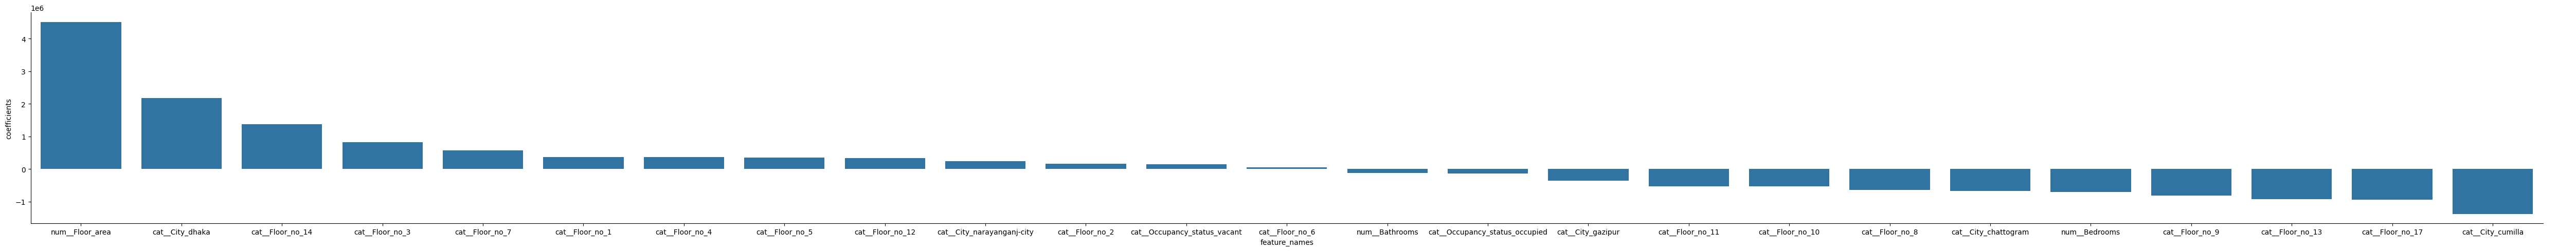

In [ ]:
# Visualize ranked features using seaborn
sns.catplot(x="feature_names",
            y="coefficients",
            data=feature_importance.sort_values(by="coefficients", ascending=False),
            kind="bar",
            aspect=100/10) # Resize graph

In [ ]:
y_pred = regressor.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
# conversion rate € => ৳ : 132
euro_to_taka = 132
print('Mean Absolute Error:', round(mae,2),'৳')
print('Mean Absolute Error:', round(mae/euro_to_taka,2),'€')

Mean Absolute Error: 1846017.73 ৳
Mean Absolute Error: 13984.98 €
